In [1]:
import os.path as op
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result_dir = op.abspath("../results")
corr_dir = op.join(result_dir, "gradient_decoding", "lda_neurosynth_KMeans_corr")

corr_lst = sorted(glob(op.join(corr_dir, "*_corr.npy")))
null_lst = sorted(glob(op.join(corr_dir, "*_null.npy"))) 

In [11]:
corr_test = op.join(result_dir, "gradient_decoding", "lda_neuroquery_metamaps.npy")
# null_arr = np.load(null_lst[0])

In [12]:
null_mem = np.memmap(corr_test,dtype="float32",mode="r",shape=(200, 59412))

In [15]:
null_mem[0,0]

-1.194625

In [10]:
print(null_arr[0,0,0])
print(null_mem[0,0,0])

0.09534960947922819
223668530.0


In [44]:
for corr_fn, null_fn in zip(corr_lst, null_lst):
    corr_arr = np.load(corr_fn)
    null_arr = np.load(null_fn)
    n_seg, n_maps, n_perm = null_arr.shape

    pval_arr = np.zeros_like(corr_arr)
    for seg_i in range(n_seg):
        for map_i in range(n_maps):
            null_corr = null_arr[seg_i, map_i, :]
            true_corr = corr_arr[seg_i, map_i]

            if true_corr > 0:
                summation = null_corr[null_corr > true_corr].sum()
            else:
                summation = null_corr[null_corr < true_corr].sum()

            p_value = abs(summation/n_perm)
            pval_arr[seg_i, map_i] = p_value


In [49]:
np.stack([pval_arr, pval_arr]).shape

(2, 10, 200)

In [46]:
pval_arr

array([[0.02142793, 0.04470562, 0.03809486, ..., 0.01065833, 0.03636944,
        0.06337701],
       [0.01752959, 0.02929129, 0.01585524, ..., 0.00272268, 0.03271352,
        0.0371283 ],
       [0.00329426, 0.00267543, 0.00922035, ..., 0.00028008, 0.00253554,
        0.01495064],
       ...,
       [0.00276344, 0.00912266, 0.00685521, ..., 0.        , 0.00220743,
        0.00047388],
       [0.0064349 , 0.00656356, 0.00228763, ..., 0.        , 0.01246302,
        0.01319604],
       [0.00509446, 0.00105076, 0.01887368, ..., 0.00874859, 0.00343908,
        0.01997828]])

0.024051102813599217

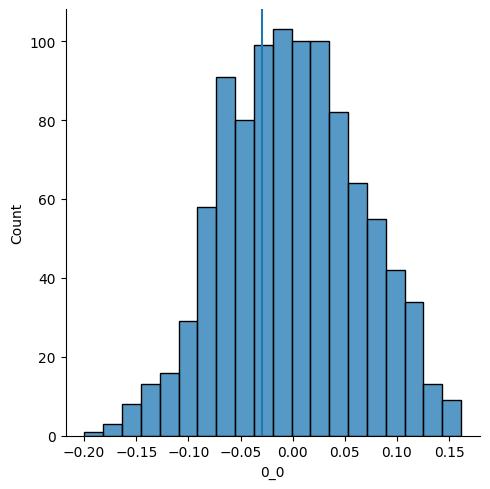

In [38]:
n_permutation = df_lst[0].shape[0]
true_corr = true_corr_lst[0][0,0]
sns.displot(df_lst[0], x="0_0")
plt.axvline(true_corr)


if true_corr > 0:
    summ = df_lst[0]["0_0"][df_lst[0]["0_0"] > true_corr].sum()
else:
    summ = df_lst[0]["0_0"][df_lst[0]["0_0"] < true_corr].sum()

p_value = abs(summ/n_permutation)
p_value